## Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from graphviz import Source

In [2]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 트리를 시각화하는 방법들

In [13]:
# 트리를 dot으로 저장 후 이미지로 변환
export_graphviz(dt_clf, out_file='tree.dot',
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                impurity=True, filled=True, rounded=True)

In [14]:
with open('tree.dot') as f:
    dot_graph = f.read()

Source(dot_graph).render('tree', format='png', cleanup=True) # cleanup : 이미지 생성 후 dot 삭제

'tree.png'

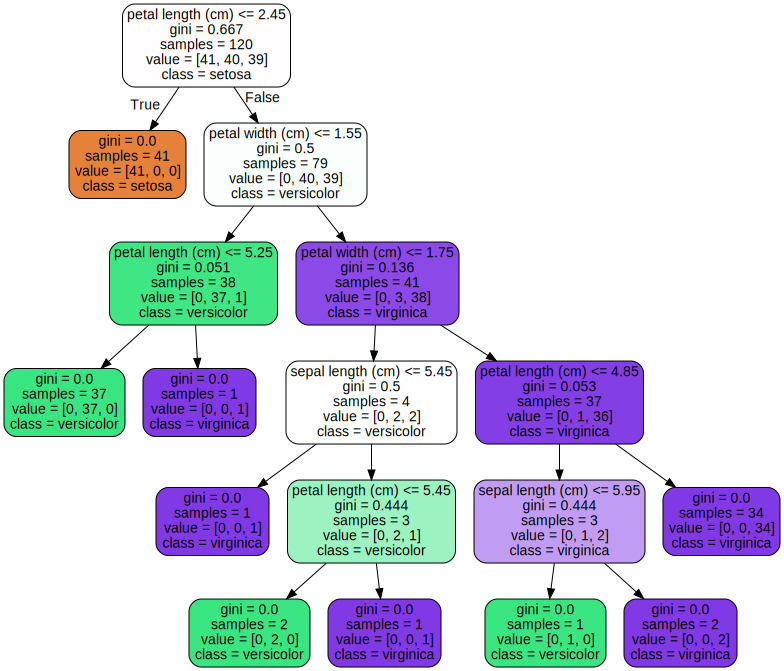

In [12]:
# dot 파일을 불러와서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
Source(dot_graph)

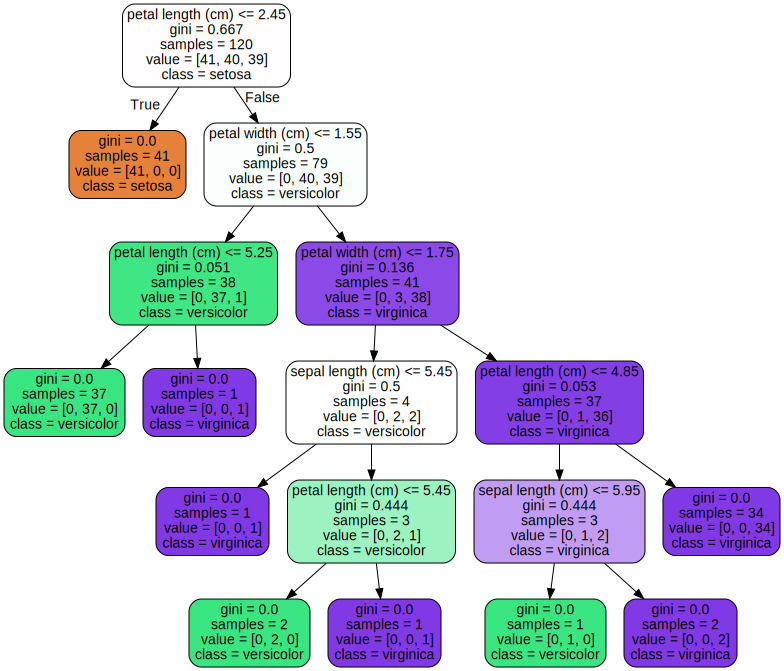

In [7]:
# out_file 설정없이 주피터 노트북상에 시각화
Source(export_graphviz(dt_clf, 
                        class_names=iris_data.target_names, 
                        feature_names=iris_data.feature_names, 
                        impurity=True, filled=True, rounded=True))

- 훈련셋에 대해 과적합 되었기 때문에 테스트 셋에 대해 예측을 제대로 하지 못했음

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [25]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

{'sepal length (cm)': 0.02500520941862888, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.5549028149313102, 'petal width (cm)': 0.42009197565006084}


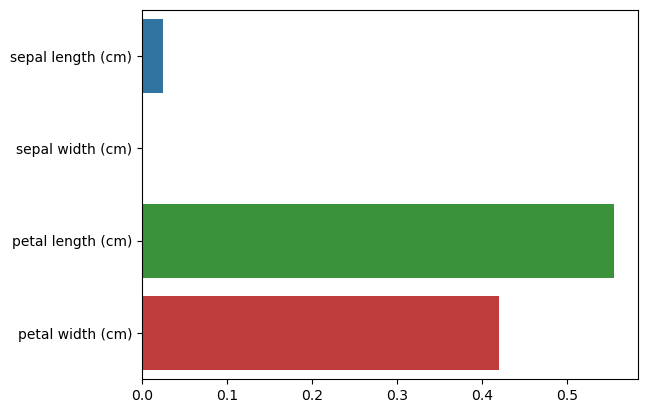

In [28]:
import seaborn as sns

print(dict(zip(iris_data['feature_names'], dt_clf.feature_importances_)))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data['feature_names'])
plt.show()

## 과적합

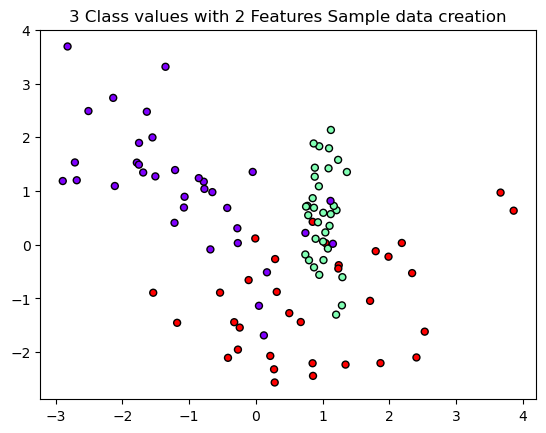

In [34]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

<Axes: >

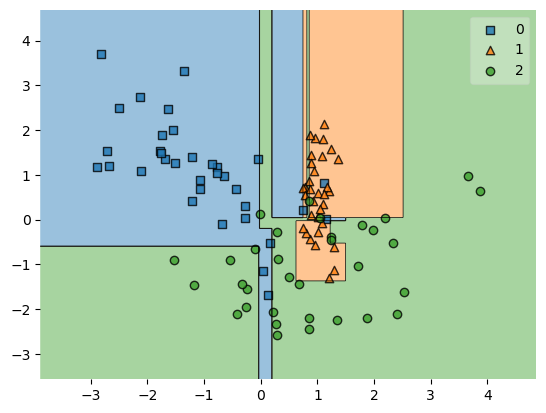

In [32]:
from mlxtend.plotting import plot_decision_regions

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
plot_decision_regions(X_features, y_labels, clf=dt_clf)

<Axes: >

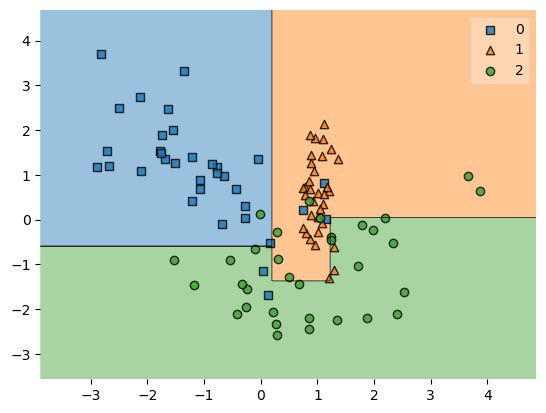

In [33]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
plot_decision_regions(X_features, y_labels, clf=dt_clf)